* 예제에 사용할 데이터 셋

In [1]:
import mglearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'black'

c:\Users\lunaw\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


<pre>forge의 데이터 산점도</pre>

X.shape (26, 2)


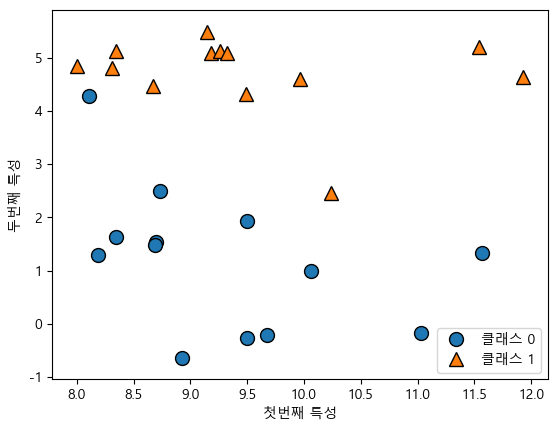

In [2]:
# 데이터셋을 만듭니다.
# make_forge()는 이진 분류 데이터셋입니다.
X, y = mglearn.datasets.make_forge();
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape", X.shape) # 26개의 데이터 포인트와 2개의 특성
plt.show()

<pre>wave 데이터셋</pre>

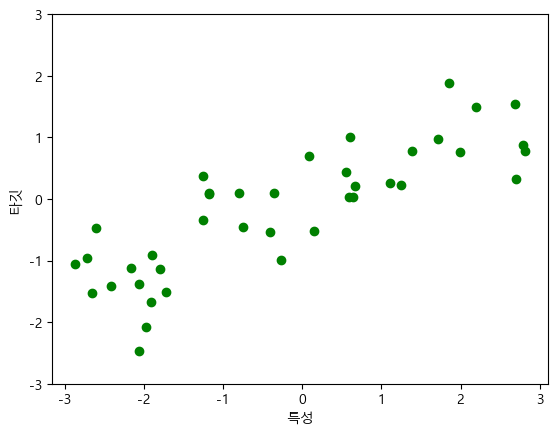

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'og', )
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show()

<pre>load_breast_cancer(위스콘신 유방암)</pre>

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key()\n", cancer.keys())

cancer.key()
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [6]:
import numpy as np

In [7]:
# malignant : 악성, benign : 양성
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<pre>Boston Housing(보스턴 주택가격)</pre>

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shpae:", X.shape)

X.shpae: (506, 104)


* k-최근접 이웃

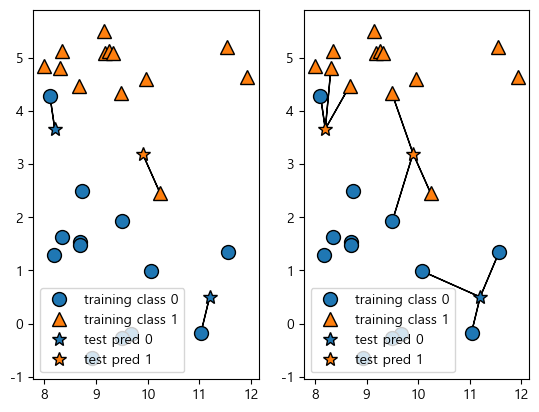

In [11]:
# n_neighbors 의 수(int) N은 N개의 가까운 데이터 셋을 찾아낸다. 
# subplot 열, 행, 몇번째 자리
plt.subplot(121)
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 근접한 이웃의 갯수가 많은 그룹으로 표시가 된다.
plt.subplot(122)
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

<pre>k-최근접 이웃 응용</pre>

In [12]:
# 훈련 세트와 테스트 세트로 데이터 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()    # forge data 가져오기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
# k-최근접 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
# 훈련 세트로 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# 테스트 데이터를 predict 함수로 통해 예측해 보기
print("테스트 세트 예측: ", clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [16]:
print("정답: ", y_test)

정답:  [1 0 1 0 1 1 0]


In [17]:
# 테스트 정확도 = 오차
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


<small>
Location String   Location Code<br>
===============   =============<br>
'best'            0<br>
'upper right'     1<br>
'upper left'      2<br>
'lower left'      3<br>
'lower right'     4<br>
'right'           5<br>
'center left'     6<br>
'center right'    7<br>
'lower center'    8<br>
'upper center'    9<br>
'center'          10<br>
===============   =============<br>
</small>

<pre>결정 경계</pre>

Figure(1000x300) [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


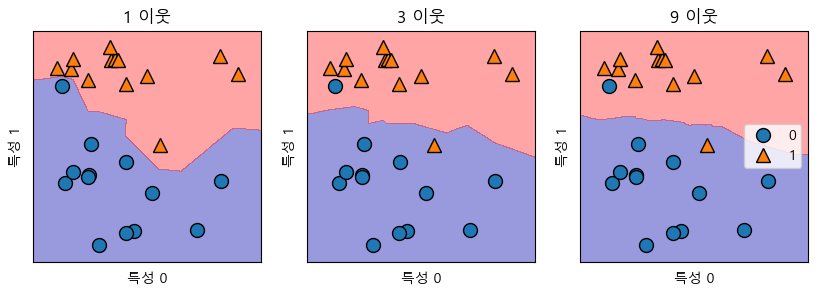

In [18]:
# 결정 경계 : xy평면도에 예측을 식으로 칠함
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

print(fig, axes)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 함수는  self 오브젝트로 리턴합니다.
    # 그래서 객체 생성과 fit 함수를 한줄에 쓸 수 있습니다.

    # 객체 생성 후 바로 모델 학습
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # 결정 경계 그리기
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[2].legend(loc=5)
plt.show()

<pre>모델의 복잡도 : 유방암 데이터셋</pre>

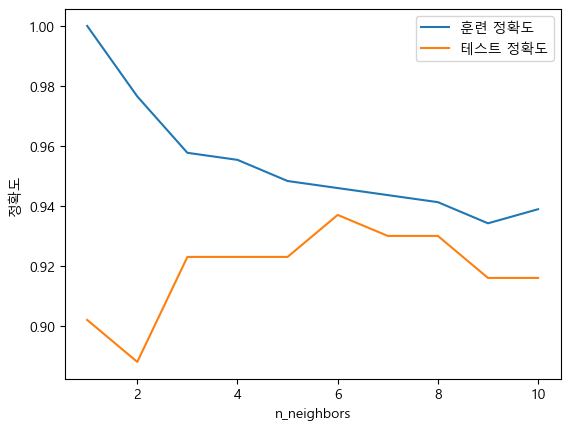

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1부터 10까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neightbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neightbors)
    clf.fit(X_train, y_train)

    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))

    # 일반화(테스트) 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
# 왼쪽으로 갈 수록 과대적합, 오른쪽을 갈 수록 과소적합이다. 최적점은 6이라는 것을 알 수 있다.

* k-최근접 이웃 회귀

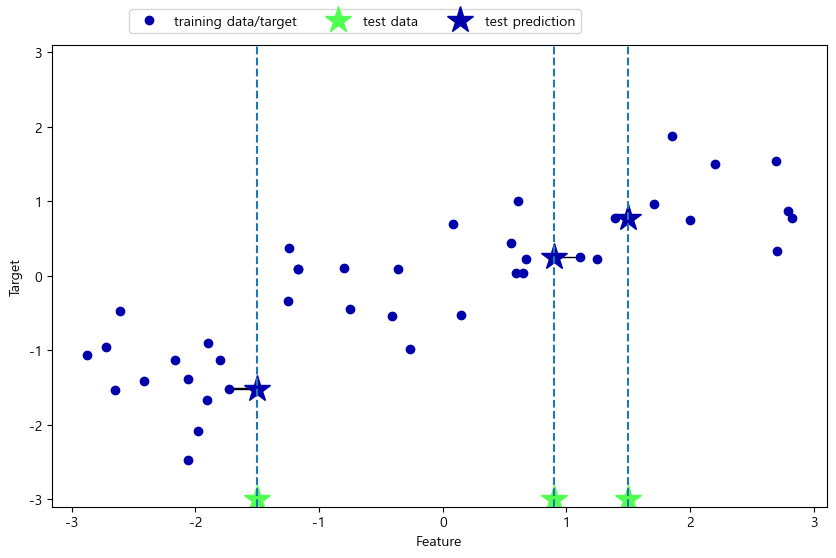

In [64]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

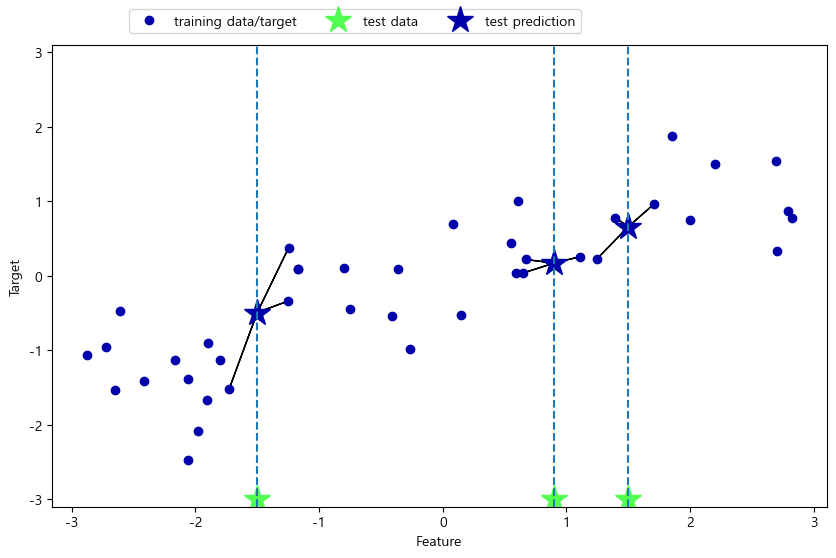

In [65]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

reg  = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [67]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


<pre>KNeighborsRegressor 분석</pre>

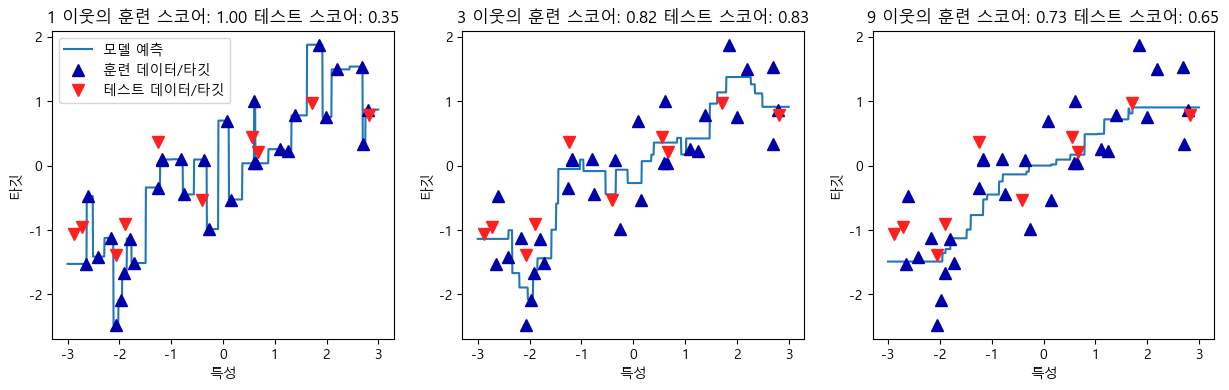

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# reshape : -1 은 무한(지정x)행, 1열
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()